# Experiment 6

## Shivam Singhal 2K18/CO/340

**AIM:** Write a program to implement Linear Regression using any appropriate dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Real estate valuation data set.xlsx')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# Describe the whole dataframe
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
# Null Value Check 
df.isnull().describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414,414,414,414,414,414,414,414
unique,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False
freq,414,414,414,414,414,414,414,414


In [6]:
X_new = np.array(df)[: , 2:7]
Y_new = np.array(df)[: , 7]

In [7]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new , Y_new , shuffle= True , test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(331, 5)
(83, 5)
(331,)
(83,)


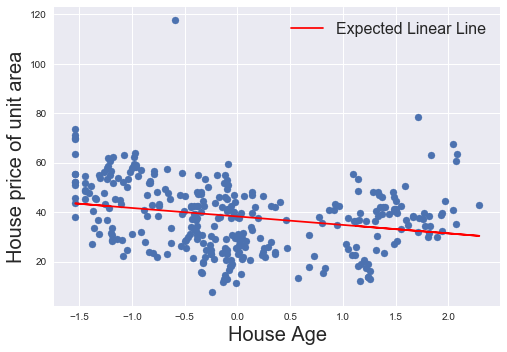

In [8]:
##Normalizing
#Normalise this dataset
#Each feature must have 0 mean, unit variance

u_train = np.mean(X_train,axis=0) 
u_test = np.mean(X_test,axis=0)
std_train = np.std(X_train,axis=0)
std_test = np.std(X_test,axis=0)

X_train = (X_train-u_train)/std_train
X_test = (X_test-u_test)/std_test

#plot feature 2 vs y
plt.style.use('seaborn')
plt.scatter(X_train[:,0],Y_train)

m, b = np.polyfit(X_train[:,0], Y_train, 1)
plt.plot(X_train[:,0], m*X_train[:,0] + b , 'r' , label = 'Expected Linear Line')

plt.legend(loc = 'upper right',fontsize = 16)
plt.xlabel("House Age",fontsize = 20)
plt.ylabel("House price of unit area",fontsize = 20)

plt.show()

In [9]:
## To make suitable for Linear reg equation y = theta*x , since coefficien of theta[0] must be 1
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack((ones,X_train))
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))
print(X_train.shape ,X_test.shape)

(331, 6) (83, 6)


In [10]:
# X - Matrix ( m x n)
# x - Vector (Single Example with n features)

#Calculation of y = theta*x.
def hypothesis(X,theta):
    return np.dot(X,theta)

# Calculation of Error
def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/X.shape[0]

# Formula for calculating R2 Score
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

# This function will calculate R2 Score of Test and Train Set
def calc_score(X ,y, theta):
    predicted = []
    for i in range(X.shape[0]):
        pred = hypothesis(X[i],theta)
        predicted.append(pred)
    predicted = np.array(predicted)
    score = r2_score(y , predicted)
    return score   
    
def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/X.shape[0]

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    train_score = []
    test_score = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
        score_train = calc_score(X_train , Y_train , theta)
        score_test = calc_score(X_test , Y_test , theta)
        train_score.append(score_train)
        test_score.append(score_test)
        
    return theta,error_list,train_score,test_score

In [11]:
theta,error_list,train_score,test_score = gradient_descent(X_train,Y_train)

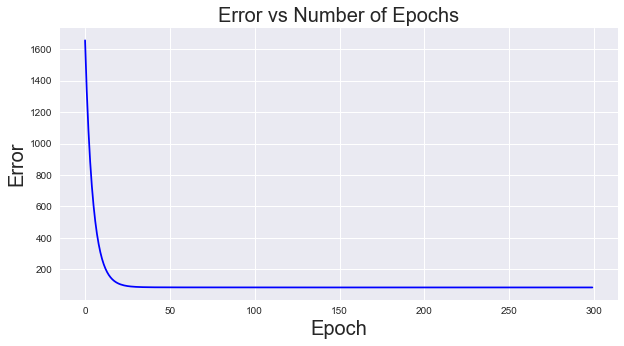

In [12]:
plt.figure(figsize = (10,5))
plt.plot(error_list , 'b')

plt.xlabel("Epoch",fontsize = 20)
plt.ylabel("Error",fontsize = 20)
plt.title("Error vs Number of Epochs",fontsize = 20)

plt.show()

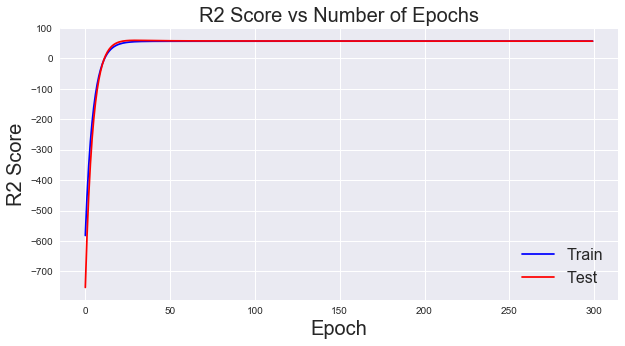

In [13]:
plt.figure(figsize = (10,5))
plt.plot(train_score , 'b' , label = 'Train')
plt.plot(test_score , 'r' , label = 'Test')

plt.legend(loc = 'lower right',fontsize = 16)
plt.xlabel("Epoch",fontsize = 20)
plt.ylabel("R2 Score",fontsize = 20)
plt.title("R2 Score vs Number of Epochs",fontsize = 20)

plt.show()

In [14]:
#R2 Score of Train and Test 
print('R2 Score of Train', train_score[-1])
print('R2 Score of Test', test_score[-1])

R2 Score of Train 56.86818296791959
R2 Score of Test 56.87873096385656


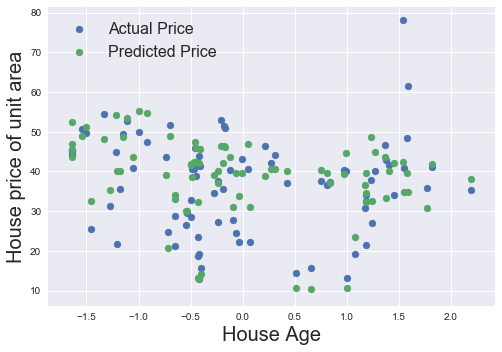

In [15]:
plt.style.use('seaborn')
plt.scatter(X_test[:,1],Y_test , label = 'Actual Price')

predicted = []
for i in range(X_test.shape[0]):
    pred = hypothesis(X_test[i],theta)
    predicted.append(pred)
predicted = np.array(predicted)

plt.scatter(X_test[:,1] , predicted , label = 'Predicted Price')

plt.legend(loc = 'upper left',fontsize = 16)

plt.xlabel("House Age",fontsize = 20)
plt.ylabel("House price of unit area",fontsize = 20)

plt.show()